1. Lab plan
    1. Historigram stretching
    2. Tresholding


2 Import modules

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import ipywidgets as widgets

In [16]:
ls imgs-main

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est FC72-9952

 R�pertoire de c:\img_proc\lab_img5\imgs-main

20/04/2022  18:21    <DIR>          .
20/04/2022  18:21    <DIR>          ..
20/04/2022  15:14           262�750 cameraman.tif
20/04/2022  15:14           525�106 house.tif
20/04/2022  15:14           525�106 lake.tif
20/04/2022  15:14           787�460 lena_color_512.tif
20/04/2022  15:14           262�598 lena_gray_512.tif
20/04/2022  15:14           262�750 livingroom.tif
20/04/2022  15:14           480�419 peppers_color.jpg
20/04/2022  15:14           526�654 peppers_color.tif
20/04/2022  15:14           525�106 peppers_gray.tif
20/04/2022  15:14           262�750 pirate.tif
20/04/2022  15:14           386�607 sent.jpg
20/04/2022  18:30    <DIR>          src
20/04/2022  15:14           525�106 walkbridge.tif
20/04/2022  15:14           262�750 woman_blonde.tif
              13 fichier(s)        5�595�162 octets
               3 R�p(s)  125�414�5

In [17]:
im1=Image.open('imgs-main/lena_color_512.tif')
im2=Image.open('imgs-main/lena_gray_512.tif')
im3=Image.open('imgs-main/cameraman.tif')

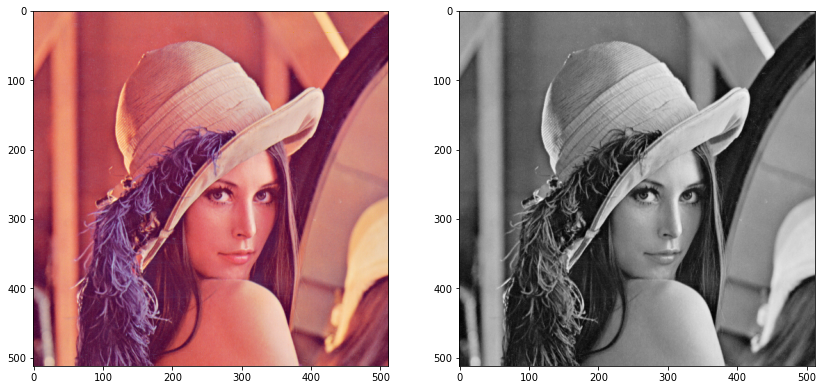

In [18]:
f,axs=plt.subplots(1,2,figsize=(14,7))
axs[0].imshow(im1)
axs[1].imshow(im2,cmap='gray')

In [19]:
type(im1), type(im2)

(PIL.TiffImagePlugin.TiffImageFile, PIL.TiffImagePlugin.TiffImageFile)

In [20]:
ar1=np.array(im1)
ar2=np.array(im2)
ar3=np.array(im3)
ar1

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [21]:
ar1.shape, ar2.shape

((512, 512, 3), (512, 512))

4 Globals

https://docs.python.org/3.9/library/functions.html

In [22]:
dc=globals()
[x for x in dc.keys() if '_' not in x]

['In',
 'Out',
 'exit',
 'quit',
 'site',
 'os',
 'sys',
 'plt',
 'np',
 'Image',
 'widgets',
 'im1',
 'im2',
 'im3',
 'f',
 'axs',
 'ar1',
 'ar2',
 'ar3',
 'dc',
 's1']

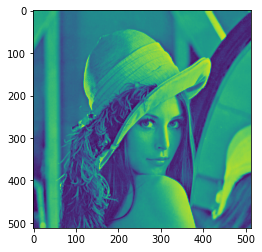

In [23]:
plt.imshow(dc['ar2'])

4 Histogram stretching

   1 aim: to change the contrast of the image
   
   2 Method: linear histogram stretching

   3 Constrast: the difference between the maximum and      minimum image value
   
   4 Equation: y=ax+b where:
   
   -x: curren image values
   -y: new image values
   -a,b: transformation coefficients


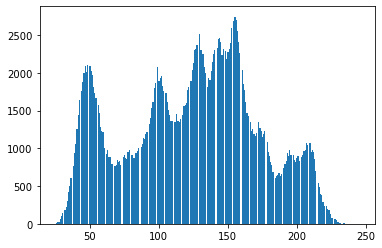

In [24]:
plt.hist(ar2.ravel(),bins=256);

In [25]:
ar2.min(), ar2.max(), ar2.dtype

(25, 245, dtype('uint8'))

In [26]:
def s1(a,b,im):
    dc=globals()
    im=dc[im].copy()
    out=im.copy()
    out=out * a + b
    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')

In [27]:
widgets.interact(s1,a=(0.5,2),b=(-30,30),im=['ar2','ar1'])
#s1(1.3,10,ar2)  #(a,b,im)

interactive(children=(FloatSlider(value=1.25, description='a', max=2.0, min=0.5), IntSlider(value=0, descripti…

<function __main__.s1(a, b, im)>

In [28]:
def s2(a,b,im):
    dc=globals()
    im=dc[im].copy()
    out=im.copy()
    out=out * a + b

    out[out<0]=0
    out[out>255]=255
    

    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')

In [29]:
widgets.interact(s1,a=(0.5,2),b=(-30,30),im=['ar2','ar1','ar3'])

interactive(children=(FloatSlider(value=1.25, description='a', max=2.0, min=0.5), IntSlider(value=0, descripti…

<function __main__.s1(a, b, im)>

## 5.1 np.polyfit()
>- input: (min,max)
>- out: (0,255): `8 bits`

In [30]:
coef=np.polyfit([ar2.min(),ar2.max()],[0,255],1)
coef

array([  1.15909091, -28.97727273])

In [31]:
pl=np.poly1d(coef)
pl(ar2[:4,:4])

array([[158.79545455, 158.79545455, 158.79545455, 157.63636364],
       [158.79545455, 158.79545455, 158.79545455, 157.63636364],
       [158.79545455, 158.79545455, 158.79545455, 157.63636364],
       [158.79545455, 158.79545455, 158.79545455, 157.63636364]])

In [32]:
def s3(im):
    
    out=im.copy()
    coef=np.polyfit([out.min(),out.max()],[0,255],1)
    pl=np.poly1d(coef)
    
    out=pl(out)

    out[out<0]=0
    out[out>255]=255
    

    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')

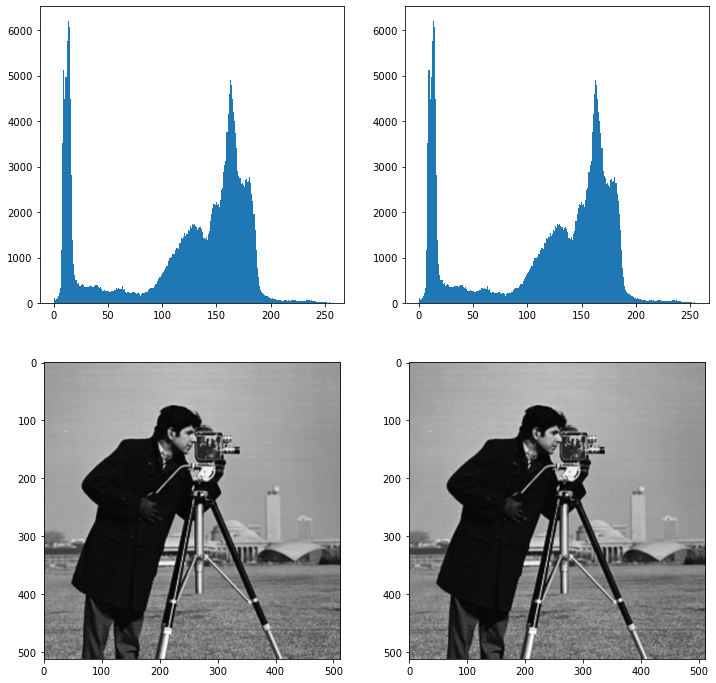

In [33]:
s3(ar3)

## 5.2  np.percentile

In [34]:
p=10
np.percentile(ar3,[p,100-p])

array([ 13., 179.])

In [35]:
def s4(p,im):
    dc=globals()
    im=dc[im].copy()
    out=im.copy()
    perc=np.percentile(ar3,[p,100-p])
    coef=np.polyfit(perc,[0,255],1)
    pl=np.poly1d(coef)
    
    out=pl(out)

    out[out<0]=0
    out[out>255]=255
    

    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')

In [36]:
# FloatSider[min=1e5, max=1e7, step=1e5]
p=widgets.FloatSlider(min=0,max=30,step=1)
widgets.interact(s4,p=p,im=['ar2','ar1','ar3'])

interactive(children=(FloatSlider(value=0.0, description='p', max=30.0, step=1.0), Dropdown(description='im', …

<function __main__.s4(p, im)>

In [37]:
## Exercise

# 1.1 Modify function to get 3 options:
#>- cut both sides
#>- cut left side
#>- cut right side


In [38]:
# 1.2 Modify function to get 3 options: cut both sides, cut left side, cut right side
def s5(a,b,im,side):
    dc=globals()
    im=dc[im].copy()
    out=im.copy()
    out=out * a + b
    if side=='both':
        out[out<0]=0
        out[out>255]=255
    elif side=='left':
        out[out<0]=0
    elif side=='right':
        out[out>255]=255
    else:
        print('Wrong side')
    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')


In [39]:
widgets.interact(s5,a=(0.5,2),b=(-30,30),im=['ar2','ar1','ar3'],side=['both','left','right'])

interactive(children=(FloatSlider(value=1.25, description='a', max=2.0, min=0.5), IntSlider(value=0, descripti…

<function __main__.s5(a, b, im, side)>

## 6 Tresholding
The simplest methode of image segmentation, that is, dividing the image into homogeneous areas.

In tresholding, pixels are divided into groups based on a `treshold value`. In the simplest case (one treshold), pixels with values below the treshold are set to `0` and pixels above 1 -a binary image is created

In [40]:
def th1(t,im):
    dc=globals()
    im=dc[im].copy()
    out=im.copy()

    out[im<t]=0
    out[im>=t]=255

    f,axs=plt.subplots(2,2,figsize=(12,12))
    axs=axs.ravel()
    axs[0].hist(im.ravel(),bins=256);
    axs[1].hist(out.ravel(),bins=256);
    axs[2].imshow(im,cmap='gray')
    axs[3].imshow(out,cmap='gray')
    

In [41]:
t=widgets.FloatSlider(min=50,max=210,step=30)
widgets.interact(th1,t=t,im=['ar2','ar1','ar3'],continuous_update=False)

interactive(children=(FloatSlider(value=50.0, description='t', max=210.0, min=50.0, step=30.0), Dropdown(descr…

<function __main__.th1(t, im)>